# Indeed/CakeResume Job Descriptions

郭耀仁

## 載入筆記本需要的套件

In [1]:
import sys
import re
import time
import copy
from random import randint
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## 檢查 Python 是否為 3.7 版本

In [2]:
if not sys.version_info.major == 3 and sys.version_info.minor >= 7:
    print("This notebook requires Python 3.7 or higher!")
else:
    print("Feel free to Run All!")

Feel free to Run All!


## Indeed

### 定義爬取 Indeed 資料所需要的函式

In [3]:
def get_first_n_job_keys(n=100):
    request_url = "https://www.indeed.com/jobs"
    first_n_job_keys = []
    for i in range(0, n, 10):
        query_string_parameters = {
            'q': 'data analyst',
            'jt': 'fulltime',
            'explvl': 'entry_level',
            'start': str(i)
        }
        response = requests.get(request_url, params=query_string_parameters)
        soup = BeautifulSoup(response.text)
        ref_routes = [e.get('href') for e in soup.select('.title a')]
        job_keys = [re.split('/|\?|&|=', rr)[4] for rr in ref_routes]
        first_n_job_keys += job_keys
        rand_int = randint(1, 3)
        print("Scraping page {}...".format(i // 10 + 1))
        print("Sleeping for {} secs...".format(rand_int))
        time.sleep(rand_int)
    return first_n_job_keys

def get_indeed_job_descriptions(first_n_job_keys):
    job_descriptions = []
    for job_key in first_n_job_keys:
        query_string_paramters = {
            'jks': job_key
        }
        request_url = 'https://www.indeed.com/rpc/jobdescs'
        response = requests.get(request_url, params=query_string_paramters)
        response_json = response.json()
        job_descriptions.append(response_json)
        rand_int = randint(1, 3)
        print("Scraping job key: {}...".format(job_key))
        print("Sleeping for {} secs...".format(rand_int))
        time.sleep(rand_int)
    return job_descriptions

### Indeed 資料爬取

In [4]:
first_100_job_keys = get_first_n_job_keys()

Scraping page 1...
Sleeping for 2 secs...
Scraping page 2...
Sleeping for 3 secs...
Scraping page 3...
Sleeping for 2 secs...
Scraping page 4...
Sleeping for 3 secs...
Scraping page 5...
Sleeping for 2 secs...
Scraping page 6...
Sleeping for 3 secs...
Scraping page 7...
Sleeping for 2 secs...
Scraping page 8...
Sleeping for 2 secs...
Scraping page 9...
Sleeping for 3 secs...
Scraping page 10...
Sleeping for 3 secs...


In [5]:
first_100_job_descriptions = get_indeed_job_descriptions(first_100_job_keys)

Scraping job key: f13ffd0ea121b4d8...
Sleeping for 3 secs...
Scraping job key: 2532431132ffbda1...
Sleeping for 2 secs...
Scraping job key: 3a376da0784075d1...
Sleeping for 3 secs...
Scraping job key: c04a8d5fa0e7869c...
Sleeping for 1 secs...
Scraping job key: 0fcfb9089f1b9810...
Sleeping for 3 secs...
Scraping job key: ea62329d9438452b...
Sleeping for 2 secs...
Scraping job key: c676a737179fa1c3...
Sleeping for 2 secs...
Scraping job key: 7f979e3d3794806b...
Sleeping for 1 secs...
Scraping job key: a09ad89a55a25f09...
Sleeping for 3 secs...
Scraping job key: 79076a53d5b28348...
Sleeping for 2 secs...
Scraping job key: a09ad89a55a25f09...
Sleeping for 1 secs...
Scraping job key: 94d68f06028bea2d...
Sleeping for 3 secs...
Scraping job key: ecd692ee6cad03ac...
Sleeping for 1 secs...
Scraping job key: 79076a53d5b28348...
Sleeping for 1 secs...
Scraping job key: 3634e45314aa3499...
Sleeping for 1 secs...
Scraping job key: d065a22cdddbf1d0...
Sleeping for 3 secs...
Scraping job key: 19bfac

### 印出 Indeed 前 10 個職缺

In [6]:
for job in first_100_job_descriptions[:10]:
    print(job)

{'f13ffd0ea121b4d8': "<div><p>We are seeking world-class problem solvers who have a passion for data and a relentless focus on execution and delivery. You will be most successful with a healthy combination of both, technical skills and business acumen. As a <b>Data Analyst </b>you will generate insights by conducting extensive analyses of PayPal&rsquo;s rich data. In the process, you will develop a deep understanding of the payments business, our site functionality, further strengthen your analytic, leadership and presentation skills and gain exposure to a wide variety of functional teams within PayPal.</p><p></p><p><b>\nKey Responsibilities</b></p><ul><li>\nUnderstand how to make data visually appealing and simple to both navigate and comprehend for end-users</li><li>\nAggregate data from various sources to construct streamlined data pipelines and integrate data from multiple PayPal systems</li><li>\nIdentify key metrics and build exec-facing dashboards to track progress of the busine

## CakeResume

### 定義爬取 CakeResume 資料所需要的函式

In [7]:
def get_first_n_page_job_links(n_pages=10):
    request_url = "https://www.cakeresume.com/jobs"
    first_n_job_links = []
    for i in range(1, n_pages+1):
        query_string_parameters = {
            'q': 'data analyst',
            'refinementList[job_type][0]': 'full_time',
            'refinementList[seniority_level][0]': 'entry_level',
            'page': str(i)
        }
        response = requests.get(request_url, params=query_string_parameters)
        soup = BeautifulSoup(response.text)
        job_links = [e.get('href') for e in soup.select('.job-link')]
        first_n_job_links += job_links
        rand_int = randint(1, 5)
        print("Scraping page {}...".format(i))
        print("Sleeping for {} secs...".format(rand_int))
        time.sleep(rand_int)
    return first_n_job_links

def get_cr_job_descriptions(job_links):
    job_descriptions = []
    for job_link in job_links:
        response = requests.get(job_link)
        soup = BeautifulSoup(response.text)
        job_desc_str = ''
        for e in soup.select(".section"):
            job_desc_str += e.text
        for i in job_desc_str:
            if re.search("[\u4e00-\u9FFF]", i) or not i.isascii():
                job_desc_str = job_desc_str.replace(i, ' ')
        job_description = {
            job_link: job_desc_str
        }
        job_descriptions.append(job_description)
        rand_int = randint(1, 5)
        print("Scraping job link {}...".format(job_link))
        print("Sleeping for {} secs...".format(rand_int))
        time.sleep(rand_int)
    return job_descriptions

### CakeResume 資料爬取

In [8]:
first_10_page_job_links = get_first_n_page_job_links()

Scraping page 1...
Sleeping for 5 secs...
Scraping page 2...
Sleeping for 2 secs...
Scraping page 3...
Sleeping for 4 secs...
Scraping page 4...
Sleeping for 2 secs...
Scraping page 5...
Sleeping for 5 secs...
Scraping page 6...
Sleeping for 5 secs...
Scraping page 7...
Sleeping for 3 secs...
Scraping page 8...
Sleeping for 2 secs...
Scraping page 9...
Sleeping for 2 secs...
Scraping page 10...
Sleeping for 5 secs...


In [9]:
first_10_page_job_descriptions = get_cr_job_descriptions(first_10_page_job_links)

Scraping job link https://www.cakeresume.com/companies/voicetube/jobs/data-analyst-business-intelligence-engineer...
Sleeping for 2 secs...
Scraping job link https://www.cakeresume.com/companies/shopee/jobs/44e83d...
Sleeping for 5 secs...
Scraping job link https://www.cakeresume.com/companies/systex/jobs/0a1a81...
Sleeping for 3 secs...
Scraping job link https://www.cakeresume.com/companies/pinkoi/jobs/data-engineer-94cf67...
Sleeping for 1 secs...
Scraping job link https://www.cakeresume.com/companies/thinkcol/jobs/data-analyst-89c0c5...
Sleeping for 2 secs...
Scraping job link https://www.cakeresume.com/companies/FooSpace/jobs/business-data-analyst-eb514c...
Sleeping for 4 secs...
Scraping job link https://www.cakeresume.com/companies/tex-yuntech-edu/jobs/f54dda...
Sleeping for 4 secs...
Scraping job link https://www.cakeresume.com/companies/shopee/jobs/shopee-app-data-analyst...
Sleeping for 1 secs...
Scraping job link https://www.cakeresume.com/companies/kapito/jobs/data-engineer-

Scraping job link https://www.cakeresume.com/companies/paradise-soft/jobs/rd-website-amp-app-shelf-assistant-welcome-conversion-track-training-fresh-people-no-experience...
Sleeping for 5 secs...
Scraping job link https://www.cakeresume.com/companies/nextbank/jobs/products-digital-deposit-planner...
Sleeping for 2 secs...
Scraping job link https://www.cakeresume.com/companies/accucrazy/jobs/community-manager-community-manager-9ff4d6...
Sleeping for 4 secs...
Scraping job link https://www.cakeresume.com/companies/hkaco/jobs/central-monitoring-system-engineer...
Sleeping for 2 secs...
Scraping job link https://www.cakeresume.com/companies/leadbest/jobs/project-executive-project-executive...
Sleeping for 5 secs...
Scraping job link https://www.cakeresume.com/companies/acti/jobs/f38a77...
Sleeping for 4 secs...
Scraping job link https://www.cakeresume.com/companies/shinepeaks-024995/jobs/product-manager-21cdd8...
Sleeping for 5 secs...
Scraping job link https://www.cakeresume.com/companies

### 印出 CakeResume 前 10 個職缺

In [10]:
for job in first_10_page_job_descriptions:
    print(job)

{'https://www.cakeresume.com/companies/voicetube/jobs/data-analyst-business-intelligence-engineer': '    Perform data cleaning and data preprocessing.Deep dive analysis and insights on key business issues.Responsible for providing analytical reports and valuable insights for decision-making Building insights dashboards for CRM platform.Communicate with production/marketing teams and solve business problems.    [Required Qualifications]\n- Possessing at least 2-year work experience of business/data analysis.\n- Excellent analytical and numerical skills.\n- Efficient in SQL-like query\n- Knowledge and understanding of digital marketing tools, data visualizations. \n- Team player, good communication skills and able to work independently.\n\n[Preferred Qualifications]\n- Expertise in exploratory data analysis and statistical inference. \n- Solid experience in Python or R\n- Familiar with cloud platform services(GCP, AWS)\n- Experience in Bigquery\n- Kaggle or other data competitions experi

## Indeed/CakeResume 整合分析

## 定義整合分析所需要的函式

In [11]:
def get_split_words(non_split_words):
    non_split_words_lowered = non_split_words.lower()
    split_words = re.split(' |\.|,', non_split_words_lowered)
    return split_words

def get_job_desc_word_list(indeed_jd, cr_jd):
    job_desc_word_list = []
    for jd in indeed_jd:
        for k in jd.keys():
            job_desc_word = get_split_words(jd[k])
            job_desc_word_list += job_desc_word
    for jd in cr_jd:
        for k in jd.keys():
            job_desc_word = get_split_words(jd[k])
            job_desc_word_list += job_desc_word
    return job_desc_word_list

def get_word_frequencies(jd_word_list):
    word_frequencies = dict()
    for word in jd_word_list:
        if word in word_frequencies.keys():
            word_frequencies[word] += 1
        else:
            word_frequencies[word] = 1
    sorted_word_frequencies = {k: v for k, v in sorted(word_frequencies.items(), key=lambda item: -item[1])}
    return sorted_word_frequencies

In [12]:
integrated_job_desc_word_list = get_job_desc_word_list(first_100_job_descriptions, first_10_page_job_descriptions)

In [13]:
word_frequencies = get_word_frequencies(integrated_job_desc_word_list)

In [14]:
word_frequencies

{'': 43524,
 'and': 2483,
 'to': 1459,
 'the': 1020,
 'of': 926,
 'data': 843,
 'in': 832,
 'a': 723,
 'with': 644,
 'for': 497,
 'or': 408,
 'is': 325,
 'our': 294,
 '\n': 272,
 'on': 259,
 'as': 228,
 'will': 220,
 'we': 219,
 'work': 212,
 'be': 210,
 'are': 208,
 'business': 205,
 'an': 199,
 'that': 196,
 'experience': 189,
 'team': 181,
 'you': 180,
 'analysis': 152,
 'this': 135,
 'from': 130,
 'your': 128,
 'analyst': 124,
 'by': 124,
 'skills': 123,
 'other': 120,
 'information': 116,
 '/': 114,
 'all': 108,
 '1': 107,
 '-': 105,
 '\n-': 103,
 'at': 99,
 '~': 98,
 'have': 92,
 'research': 89,
 'analytics': 88,
 'new': 86,
 'management': 86,
 'support': 85,
 'reports': 79,
 'company': 78,
 'tools': 78,
 'health': 78,
 'science': 76,
 'ability': 73,
 'twd/': 73,
 'related': 70,
 'job': 70,
 'sql': 69,
 'using': 69,
 'analytical': 69,
 'working': 69,
 'including': 68,
 'insights': 67,
 'marketing': 67,
 'python': 67,
 '2': 66,
 'degree': 64,
 'position': 64,
 '3': 64,
 ')': 64,
 

## （Optional）以資料視覺化探索詞頻

In [15]:
cleaned_word_frequencies = copy.deepcopy(word_frequencies)
for k, v in word_frequencies.items():
    if v >= 250:
        del cleaned_word_frequencies[k]

In [16]:
cleaned_word_frequencies

{'as': 228,
 'will': 220,
 'we': 219,
 'work': 212,
 'be': 210,
 'are': 208,
 'business': 205,
 'an': 199,
 'that': 196,
 'experience': 189,
 'team': 181,
 'you': 180,
 'analysis': 152,
 'this': 135,
 'from': 130,
 'your': 128,
 'analyst': 124,
 'by': 124,
 'skills': 123,
 'other': 120,
 'information': 116,
 '/': 114,
 'all': 108,
 '1': 107,
 '-': 105,
 '\n-': 103,
 'at': 99,
 '~': 98,
 'have': 92,
 'research': 89,
 'analytics': 88,
 'new': 86,
 'management': 86,
 'support': 85,
 'reports': 79,
 'company': 78,
 'tools': 78,
 'health': 78,
 'science': 76,
 'ability': 73,
 'twd/': 73,
 'related': 70,
 'job': 70,
 'sql': 69,
 'using': 69,
 'analytical': 69,
 'working': 69,
 'including': 68,
 'insights': 67,
 'marketing': 67,
 'python': 67,
 '2': 66,
 'degree': 64,
 'position': 64,
 '3': 64,
 ')': 64,
 'status': 63,
 'their': 62,
 'opportunity': 61,
 'role': 61,
 'learning': 61,
 '\n2': 61,
 'apply': 60,
 'knowledge': 60,
 '(': 59,
 'solutions': 58,
 'and/or': 57,
 'provide': 57,
 'develop

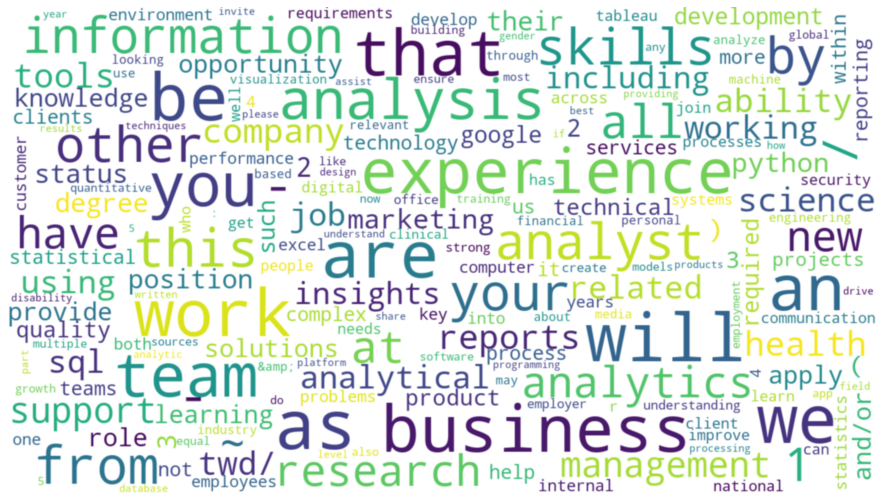

In [17]:
wordcloud = WordCloud(width=1280, height=720, background_color='white', max_font_size=100).generate_from_frequencies(cleaned_word_frequencies)
figure = plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation='bicubic')
plt.axis("off")
plt.show()